<a href="https://colab.research.google.com/github/Felixwkk/food-classificaion/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://ncov.dxy.cn/ncovh5/view/pneumonia
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)
from matplotlib import pyplot as plt

headers = {'Accept-Language': 'en-US,en;q=0.8'}

page = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia', headers=headers)
soup = BeautifulSoup(page.content, "html.parser")


In [0]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag]

In [0]:
html = soup.find('body').get_text()

In [0]:
html 

'try { window.getListByCountryTypeService2 = [{"id":38,"createTime":1581314815000,"modifyTime":1581324403000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"6","provinceName":"日本","provinceShortName":"","cityName":"","confirmedCount":156,"suspectedCount":0,"curedCount":4,"deadCount":0,"comment":"","sort":0,"operator":"wangying1","locationId":951002},{"id":35,"createTime":1581314815000,"modifyTime":1581319542000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"3","provinceName":"新加坡","provinceShortName":"","cityName":"","confirmedCount":43,"suspectedCount":0,"curedCount":2,"deadCount":0,"comment":"","sort":0,"operator":"wangying1","locationId":952009},{"id":34,"createTime":1581314815000,"modifyTime":1581319542000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"2","provinceName":"泰国","provinceShortName":"","cityName":"","confirmedCount":32,"suspectedCount":0,"curedCount":10,"deadCount":0,"comment":"","sort":0,"operator":"wangying1","locationId":952010},{"id":

In [0]:
html = html.split('tags') # convert to a list of records
del html[0] # remove the first row

In [0]:
rows = ['Country Type', 'Continents', 'Province Name', 'Province Short Name', 'City Name', 'ConfirmedCount','SuspectedCount', 'CuredCount','DeadCount']

In [0]:
table = pd.DataFrame(sub.split(',') for sub in html) # split by commas
row_val, column_val = table.shape
column_val

2996

In [0]:
table = table.drop(columns=0) # remove not required first columns
table.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2956,2957,2958,2959,2960,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970,2971,2972,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995
0,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""6""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":156","""suspectedCount"":0","""curedCount"":4","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""wangying1""","""locationId"":951002}","{""id"":35","""createTime"":1581314815000","""modifyTime"":1581319542000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""3""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":43","""suspectedCount"":0","""curedCount"":2","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""wangying1""","""locationId"":952009}","{""id"":34","""createTime"":1581314815000","""modifyTime"":1581319542000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""2""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":32","""suspectedCount"":0","""curedCount"":10","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""wangying1""","""locationId"":952010}","{""id"":39","""createTime"":1581314815000","""modifyTime"":1581319542000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""7""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":27","""suspectedCount"":0","""curedCount"":3","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""wangying1""","""locationId"":951004}","{""id"":36","""createTime"":1581314815000","""modifyTime"":1581319542000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""4""","""provinceName"":""马来西亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":18","""suspectedCount"":0","""curedCount"":1","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""wangying1""","""locationId"":952007}","{""id"":43","""createTime"":1581314815000","""modifyTime"":1581319542000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
table.drop(table.columns[10:column_val], axis = 1, inplace = True)

In [0]:
table.drop(columns = 3, inplace = True)
table.head()

,1,2,4,5,6,7,8,9,10
0,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":156","""suspectedCount"":0","""curedCount"":4","""deadCount"":0"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":43","""suspectedCount"":0","""curedCount"":2","""deadCount"":0"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":32","""suspectedCount"":0","""curedCount"":10","""deadCount"":0"
3,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":27","""suspectedCount"":0","""curedCount"":3","""deadCount"":0"
4,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""马来西亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":18","""suspectedCount"":0","""curedCount"":1","""deadCount"":0"


In [0]:
table.columns = rows

In [0]:
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":156","""suspectedCount"":0","""curedCount"":4","""deadCount"":0"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":43","""suspectedCount"":0","""curedCount"":2","""deadCount"":0"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":32","""suspectedCount"":0","""curedCount"":10","""deadCount"":0"
3,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":27","""suspectedCount"":0","""curedCount"":3","""deadCount"":0"
4,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""马来西亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":18","""suspectedCount"":0","""curedCount"":1","""deadCount"":0"


In [0]:

table['Country Type'] = table["Country Type"].str.replace('"countryType":', "")
table['Continents'] = table['Continents'].str.replace('"continents":"','')
table['Continents'] = table['Continents'].str.replace('"','')
table['Province Name'] = table['Province Name'].str.replace('"provinceName":"','')
table['Province Name'] = table['Province Name'].str.replace('"','')
table['Province Short Name']= table['Province Short Name'].str.replace('"provinceShortName":','')
table['City Name'] = table['City Name'].str.replace('"cityName":','')
table['ConfirmedCount']= table['ConfirmedCount'].str.replace('"confirmedCount":','')
table['SuspectedCount']= table['SuspectedCount'].str.replace('"suspectedCount":','')
table['CuredCount']=table['CuredCount'].str.replace('"curedCount":','')
table['DeadCount']= table['DeadCount'].str.replace('"deadCount":','')
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,亚洲,日本,"""""","""""",156,0,4,0
1,2,亚洲,新加坡,"""""","""""",43,0,2,0
2,2,亚洲,泰国,"""""","""""",32,0,10,0
3,2,亚洲,韩国,"""""","""""",27,0,3,0
4,2,亚洲,马来西亚,"""""","""""",18,0,1,0


In [0]:
table['Continents'] = table['Continents'].str.replace('亚洲','Asia')
table['Continents'] = table['Continents'].str.replace('大洋洲', 'Oceania')
table['Continents'] = table['Continents'].str.replace('北美洲', 'North Americas')
table['Continents'] = table['Continents'].str.replace('欧洲', 'Europe')



table['Province Name'] = table['Province Name'].str.replace('日本','Japan')
table['Province Name'] = table['Province Name'].str.replace('泰国','Thailand')
table['Province Name'] = table['Province Name'].str.replace('新加坡', 'Singapore')
table['Province Name'] = table['Province Name'].str.replace('韩国','Korea')
table['Province Name'] = table['Province Name'].str.replace('澳大利亚','Australia')
table['Province Name'] = table['Province Name'].str.replace('德国','Germany')
table['Province Name'] = table['Province Name'].str.replace('美国', 'USA')
table['Province Name'] = table['Province Name'].str.replace('马来西亚', 'Malaysia')
table['Province Name'] = table['Province Name'].str.replace('法国','France')
table['Province Name'] = table['Province Name'].str.replace('越南', 'Vietnam')
table['Province Name'] = table['Province Name'].str.replace('阿联酋','United Arab Emirates')
table['Province Name'] = table['Province Name'].str.replace('加拿大','Canada')
table['Province Name'] = table['Province Name'].str.replace('印度','India')
table['Province Name'] = table['Province Name'].str.replace('意大利', 'Itlay')
table['Province Name'] = table['Province Name'].str.replace('英国', 'England')
table['Province Name'] = table['Province Name'].str.replace('俄罗斯','Russia')
table['Province Name'] = table['Province Name'].str.replace('菲律宾', 'Philippines')
table['Province Name'] = table['Province Name'].str.replace('尼泊尔','Nepal')
table['Province Name'] = table['Province Name'].str.replace('柬埔寨','Cambodia')
table['Province Name'] = table['Province Name'].str.replace('斯里兰卡', 'Sri Lanka')
table['Province Name'] = table['Province Name'].str.replace('芬兰', 'Finland')
table['Province Name'] = table['Province Name'].str.replace('西班牙', 'Spain')
table['Province Name'] = table['Province Name'].str.replace('瑞典','Sweden')
table['Province Name'] = table['Province Name'].str.replace('比利时', 'Belgium')
table['Province Name'] = table['Province Name'].str.replace('青海省', '青海省 Qing Hai')
table['Province Name'] = table['Province Name'].str.replace('新疆维吾尔自治区', '新疆维吾尔自治区 Xinjiang Uygur')
table['Province Name'] = table['Province Name'].str.replace('宁夏回族自治区', '宁夏回族自治区 Ningxia Hui')
table['Province Name'] = table['Province Name'].str.replace('内蒙古自治区', '内蒙古自治区 Inner Mongolia')
table['Province Name'] = table['Province Name'].str.replace('西藏自治区', '西藏自治区 Tibet')
table['Province Name'] = table['Province Name'].str.replace('台湾', '台湾 Taiwan')
table['Province Name'] = table['Province Name'].str.replace('澳门','澳门 Macao')
table['Province Name'] = table['Province Name'].str.replace('香港','香港 Hong Kong')
table['Province Name'] = table['Province Name'].str.replace('吉林省','吉林省 Jilin')
table['Province Name'] = table['Province Name'].str.replace('甘肃省','甘肃省 Gansu')
table['Province Name'] = table['Province Name'].str.replace('贵州省', '贵州省 GuiZhou')
table['Province Name'] = table['Province Name'].str.replace('天津市','天津市 TianJin')
table['Province Name'] = table['Province Name'].str.replace('辽宁省', '辽宁省 Liao Ning')
table['Province Name'] = table['Province Name'].str.replace('山西省', '山西省 Shanxi')
table['Province Name'] = table['Province Name'].str.replace('海南省', '海南省 Hainan')
table['Province Name'] = table['Province Name'].str.replace('云南省','云南省 Yunnan')
table['Province Name'] = table['Province Name'].str.replace('河北省', '河北省 Hebei')
table['Province Name'] = table['Province Name'].str.replace('广西壮族自治区', '广西壮族自治区 GuangXi Zhuang')
table['Province Name'] = table['Province Name'].str.replace('陕西省', '陕西省 ShaanXi')
table['Province Name'] = table['Province Name'].str.replace('黑龙江省', '黑龙江省 HeiLongJiang')
table['Province Name'] = table['Province Name'].str.replace('福建省','福建省 FuJian')
table['Province Name'] = table['Province Name'].str.replace('北京市', '北京市 Beijing')
table['Province Name'] = table['Province Name'].str.replace('上海市','上海市 Shanghai')
table['Province Name'] = table['Province Name'].str.replace('山东省', '山东省 ShanDong')
table['Province Name'] = table['Province Name'].str.replace('四川省','四川省 Sichuan')
table['Province Name'] = table['Province Name'].str.replace('江苏省', '江苏省 JiangSu')
table['Province Name'] = table['Province Name'].str.replace('重庆市', '重庆市 Chong Qing')
table['Province Name'] = table['Province Name'].str.replace('江西省', '江西省 JiangXi')
table['Province Name'] = table['Province Name'].str.replace('安徽省', '安徽省 AnHui')
table['Province Name'] = table['Province Name'].str.replace('湖南省', '湖南省 Hunan')
table['Province Name'] = table['Province Name'].str.replace('河南省','河南省	Henan')
table['Province Name'] = table['Province Name'].str.replace('广东省','广东省 GuangDong')
table['Province Name'] = table['Province Name'].str.replace('浙江省', '浙江省 ZheJiang')
table['Province Name'] = table['Province Name'].str.replace('湖北省', '湖北省 Hubei')



In [0]:
table.drop('City Name',axis = 1, inplace = True)
table

,Country Type,Continents,Province Name,Province Short Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,Asia,Japan,"""""",156,0,4,0
1,2,Asia,Singapore,"""""",43,0,2,0
2,2,Asia,Thailand,"""""",32,0,10,0
3,2,Asia,Korea,"""""",27,0,3,0
4,2,Asia,Malaysia,"""""",18,0,1,0
5,2,Oceania,Australia,"""""",15,0,3,0
6,2,Asia,Vietnam,"""""",14,0,1,0
7,2,Europe,Germany,"""""",14,0,0,0
8,2,North Americas,USA,"""""",12,0,0,0
9,2,Europe,France,"""""",11,0,0,0


In [0]:
print()

In [0]:
#replace empty cell in Continent with  China

for x in table.itertuples():
  if x.Continents=="":
    table.at[x.Index,'Continents'] = 'China'

print(table['Continents'])


0               Asia
1               Asia
2               Asia
3               Asia
4               Asia
5            Oceania
6               Asia
7             Europe
8     North Americas
9             Europe
10    North Americas
11              Asia
12              Asia
13            Europe
14            Europe
15              Asia
16            Europe
17            Europe
18              Asia
19              Asia
20              Asia
21            Europe
22            Europe
23            Europe
24             China
25             China
26             China
27             China
28             China
29             China
30             China
31             China
32             China
33             China
34             China
35             China
36             China
37             China
38             China
39             China
40             China
41             China
42             China
43             China
44             China
45             China
46             China
47           

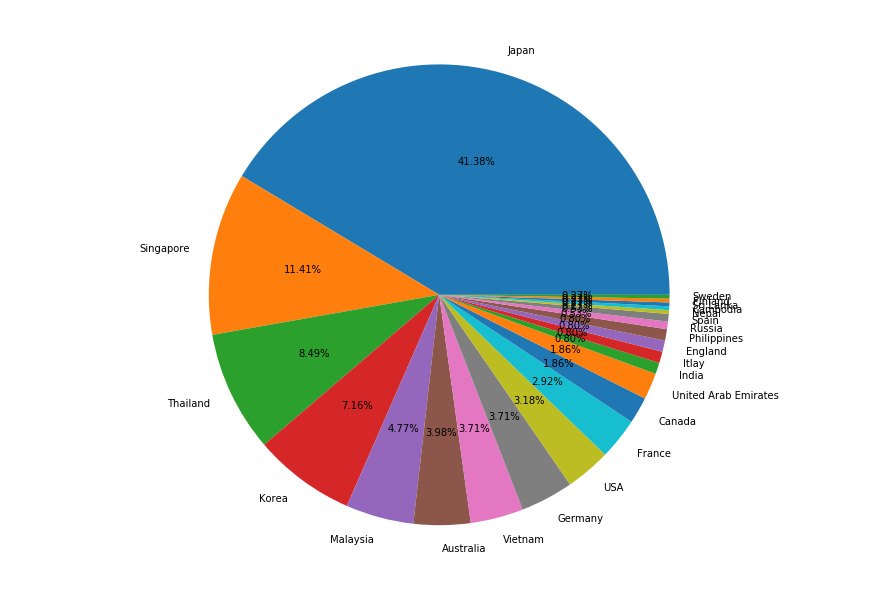

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = table['Province Name'][0:23]
students = table['ConfirmedCount'][0:23]
ax.pie(students, labels = langs,
       autopct='%1.2f%%'
       )

#plt.pie(table['Continents', table['ConfirmedCount']])
plt.show()

In [0]:
# convert the confirmed count from string to int
table['sort'] = table['ConfirmedCount'].str.extract('(\d+)', expand=False).astype(int)
table.sort_values('sort',inplace=True)
table = table.drop('sort', axis=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24191 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_

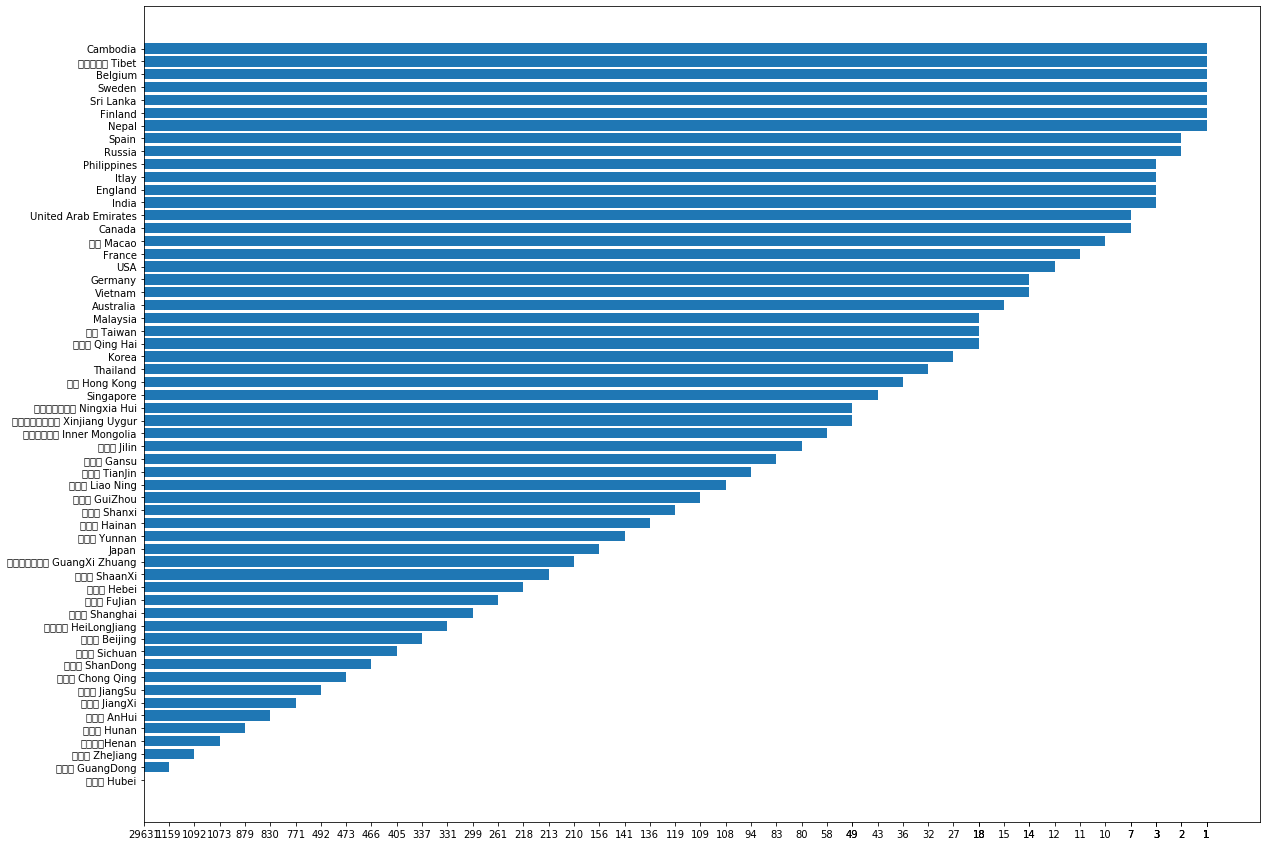

In [0]:
plt.figure(figsize = (20,15))
#table.sort_values(by='ConfirmedCount', inplace=True)
plt.barh(table['Province Name'],table['ConfirmedCount'])
_ = plt.xticks(table['ConfirmedCount'])

In [0]:
table

,Country Type,Continents,Province Name,Province Short Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
57,1,China,湖北省 Hubei,"""湖北""",29631,0,1797,871
56,1,China,广东省 GuangDong,"""广东""",1159,0,165,1
55,1,China,浙江省 ZheJiang,"""浙江""",1092,0,215,0
54,1,China,河南省\tHenan,"""河南""",1073,0,181,6
53,1,China,湖南省 Hunan,"""湖南""",879,0,201,1
52,1,China,安徽省 AnHui,"""安徽""",830,0,88,3
51,1,China,江西省 JiangXi,"""江西""",771,0,102,1
50,1,China,江苏省 JiangSu,"""江苏""",492,0,80,0
49,1,China,重庆市 Chong Qing,"""重庆""",473,0,61,2
48,1,China,山东省 ShanDong,"""山东""",466,0,64,1


In [0]:
! pip install pyplotz

  Created wheel for pyplotz: filename=pyplotz-0.24-cp36-none-any.whl size=3666 sha256=5f793be8f03a422747b0a08f0abe9105f9b5fd56921166456293b0f32fa35153
  Stored in directory: /root/.cache/pip/wheels/c2/60/51/0dd5298dfbd33ea0dc7fa6e860903199d685249a1ab3362c89
Successfully built pyplotz


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'chinese.simhei.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

plt.rcParams['font.sans-serif'] = ['chinese.simhei.ttf']
plt.rcParams['font.serif'] = ['chinese.SimHei.ttf']

plt.rcParams['axes.unicode_minus'] = False
figure = plt.figure(figsize=(38,14),dpi=80)
#ax = figure.add_axes((0.1, 0.1, 0.8, 0.8))
plt.plot(table['Province Name'],table['ConfirmedCount'], color=(1, 0, 0, 1), linewidth=2.0, label='实际值', 
          )
#plt.plot(X_test,test_predict, 'c*-', color=(0, 0, 1, 1), linewidth=2.0, label='预测值')

plt.title("模型结果",fontproperties=fontprop)
plt.xlabel("X值",fontproperties=fontprop)
plt.ylabel("Y值",fontproperties=fontprop)
plt.legend(loc = "lower left",prop=fontprop)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['chinese.simhei', 'Arial']})
plt.show()

try downloading
start downloading default chinese font(only for first time)
downloading complete
Font installed at the first time


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


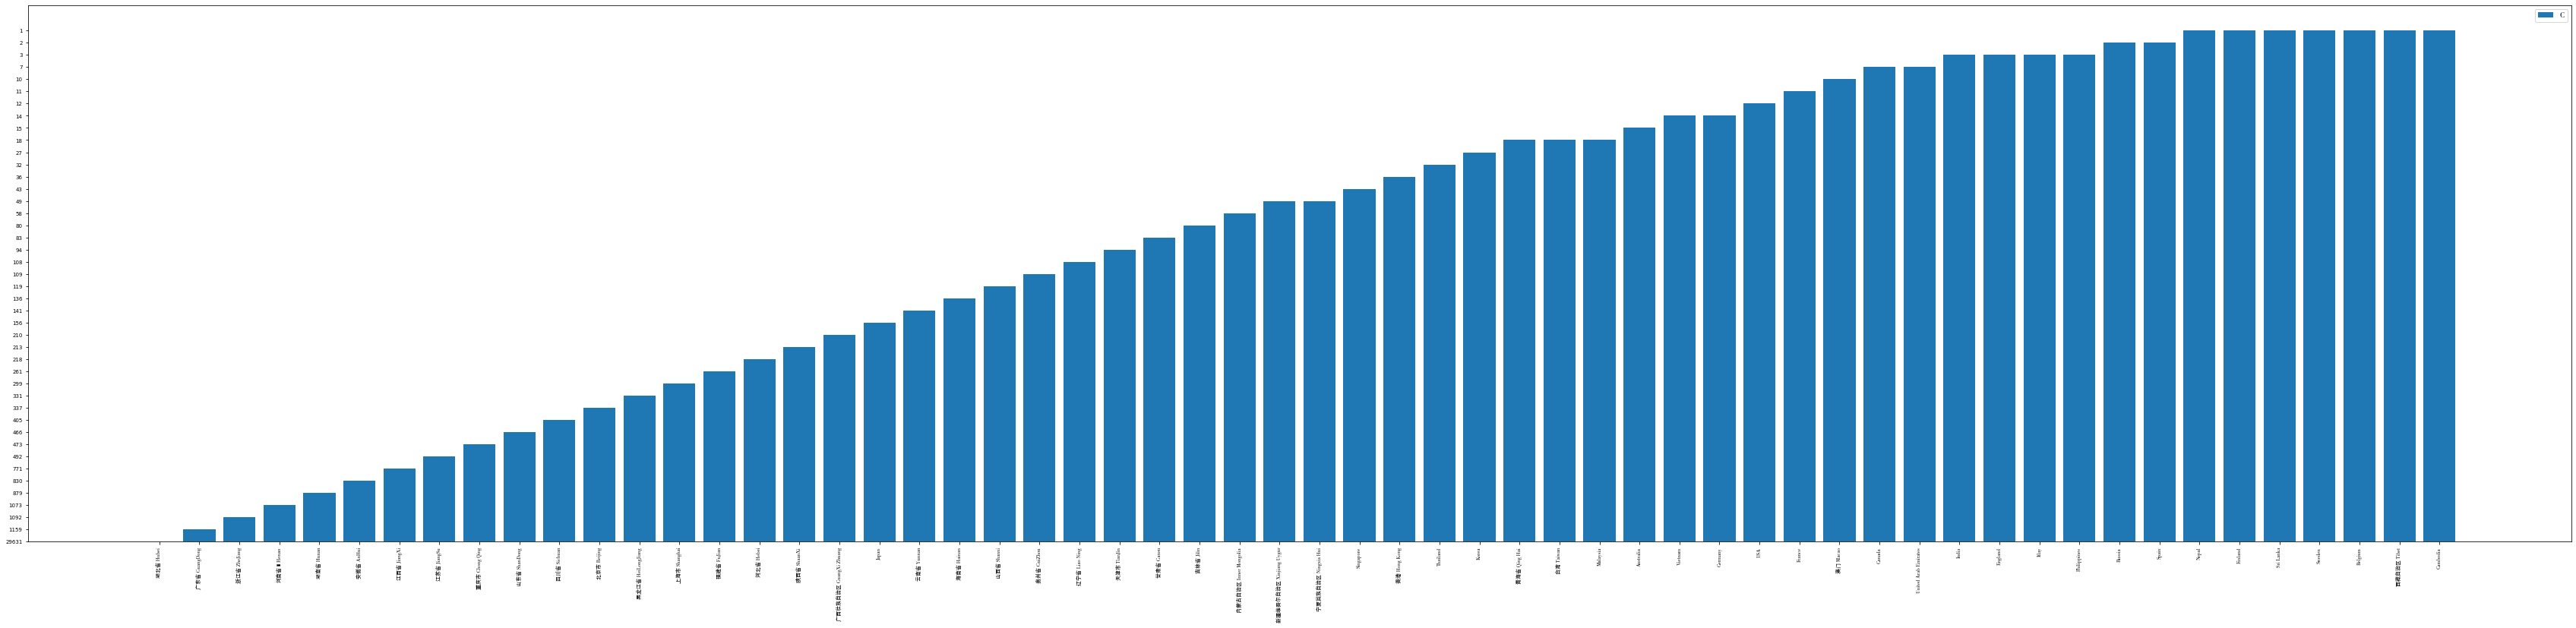

In [0]:
from pyplotz.pyplotz import PyplotZ
pltz = PyplotZ()
pltz.enable_chinese()
pltz.set_figure_size(60,13)
pltz.bar(table['Province Name'],table['ConfirmedCount'])

pltz.xticks(np.arange(len(table['Province Name'])),table['Province Name'],rotation='90')
pltz.legend('Confirmed Count')
pltz.automate_font_size(scale=.2) 
pltz.show()

In [82]:
# upload the csv file into colab
filename = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Confirmed.csv'
filename_death = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Deaths.csv'
filename_recover = 'https://raw.githubusercontent.com/CSSEGISandData/2019-nCoV/master/time_series/time_series_2019-ncov-Recovered.csv'

data = pd.read_csv(filename)
data_death = pd.read_csv(filename_death)
data_recover = pd.read_csv(filename_recover)

data.head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779,830,830,830
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326,337,337,337
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450,468,473,486
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250,261,261,261
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79,83,83,86


In [0]:
data.drop([ 'Lat', 'Long'], axis = 1, inplace=True)
data_death.drop(['Lat','Long'],axis = 1, inplace =True)
data_recover.drop(['Lat','Long'], axis = 1, inplace = True)

In [84]:
data.fillna(0.0, inplace = True)
data_death.fillna (0.0 , inplace = True)
data_recover.fillna(0.0, inplace = True)
data.head()

,Province/State,Country/Region,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30
0,Anhui,Mainland China,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779,830,830,830
1,Beijing,Mainland China,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326,337,337,337
2,Chongqing,Mainland China,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450,468,473,486
3,Fujian,Mainland China,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250,261,261,261
4,Gansu,Mainland China,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79,83,83,86


In [0]:
import matplotlib.pyplot as plt

data_numbers = data[data.columns[2:]].astype(int)
data.drop(data.columns[2:],axis =1, inplace = True)
data = pd.concat([data, data_numbers], axis =1)
plt.figure(figsize=(25,10), dpi= 80)
#data.iloc[:,1:].plot.bar(figsize=(25,10))
#plt.plot(data['Province/State'],data['1/21/20 22:00'])
#plt.show()
data.head()

,Province/State,Country/Region,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20
0,Anhui,Mainland China,0,1,9,15,15,39,39,60,60,70,70,70,106,106,106,152,152,152,200,200,237,297,408,480,480,530,530,591,591,591,665,733,733,779,779,830
1,Beijing,Mainland China,10,14,22,26,36,36,41,51,68,68,72,80,80,91,91,91,111,111,111,114,139,168,191,212,212,228,253,274,274,274,297,315,315,326,326,337
2,Chongqing,Mainland China,5,6,9,27,27,57,57,75,75,110,110,110,132,132,132,147,147,147,165,182,211,247,300,337,337,366,376,389,400,400,415,426,428,446,450,468
3,Fujian,Mainland China,0,1,5,5,10,10,18,18,35,35,56,59,59,80,80,82,84,84,101,101,120,144,159,179,179,194,205,215,215,215,224,239,239,250,250,261
4,Gansu,Mainland China,0,0,2,2,2,4,4,7,7,14,14,14,19,19,19,24,24,24,26,26,29,35,51,55,55,57,57,62,62,62,67,71,79,79,79,83


<Figure size 2000x800 with 0 Axes>

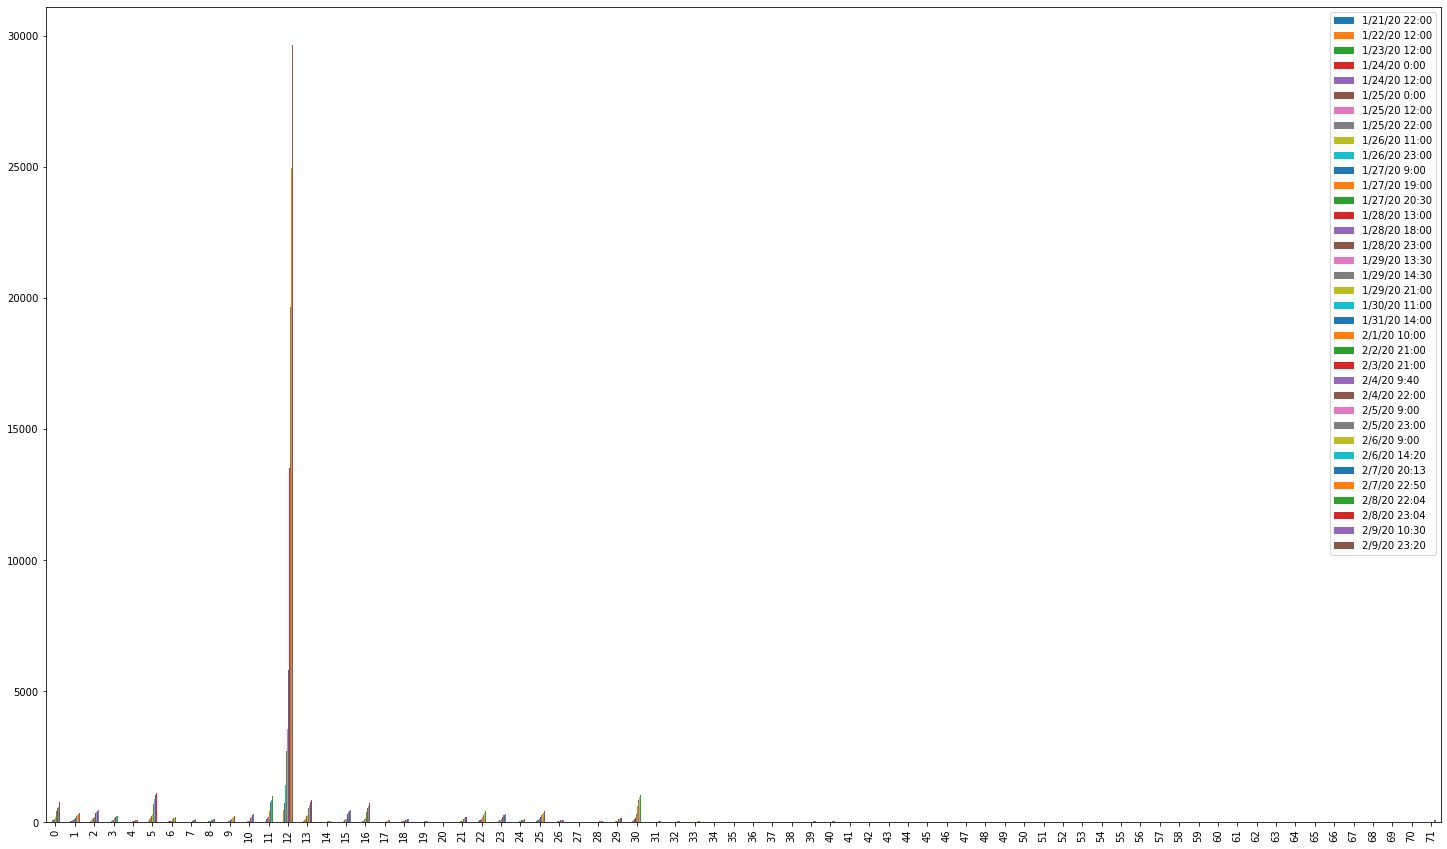

In [0]:
data.plot.bar(figsize = (25,15))

In [0]:
data.iloc[12,1:]

Country/Region        Mainland China
1/21/2020 10:00 PM               270
1/22/2020 12:00 PM               444
1/23/2020 12:00 PM               444
1/24/2020 12:00 AM               549
1/24/2020 12:00 PM               549
1/25/2020 12:00 AM               729
1/25/2020 12:00 PM               761
1/25/2020 10:00 PM              1052
1/26/2020 11:00 AM              1058
1/26/2020 11:00 PM              1423
1/27/2020 9:00 AM               1423
1/27/2020 7:00 PM               1423
1/27/2020 8:30 PM               2714
1/28/2020 1:00 PM               2714
1/28/2020 6:00 PM               3554
1/28/2020 11:00 PM              3554
1/29/2020 1:30 PM               3554
1/29/2020 2:30 PM               3554
1/29/2020 9:00 PM               4586
1/30/2020 11:00 AM              4903
1/31/2020 2:00 PM               5806
1/31/2020 7:00 PM               7153
2/1/2020 10:00 AM               7153
2/2/2020 9:00 PM               11177
2/3/2020 9:00 PM               13522
2/4/2020 9:40 AM               13522
2

In [0]:
data.describe()

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,4.583333,7.708333,9.083333,12.236111,13.069444,18.791667,19.916667,27.972222,29.416667,38.805556,40.083333,40.638889,62.125000,65.138889,77.472222,84.125000,85.625000,85.625000,108.083333,114.361111,137.8750,167.000000,240.194444,280.527778,285.958333,340.319444,341.763889,392.694444,393.666667,393.791667,437.944444,484.708333,485.597222,521.513889,522.111111,563.000000
std,31.829099,52.283204,52.312374,64.872463,64.879808,86.354810,90.026405,124.753500,125.542064,168.895387,168.918745,168.972396,319.721795,320.007628,418.183125,419.439597,419.629429,419.629563,541.701954,578.816235,685.8991,844.432454,1317.004889,1591.914340,1592.906781,1963.441968,1963.475293,2314.225753,2314.263007,2314.243806,2601.737544,2935.507713,2935.499538,3187.776800,3187.765059,3485.114515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,1.000000,1.000000,1.500000,2.000000,2.000000,2.000000,3.500000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,6.500000,6.500000,6.500000,6.500000,7.500000,8.0000,8.500000,10.000000,10.000000,11.000000,11.500000,11.500000,12.000000,12.500000,14.000000,17.000000,17.000000,17.500000,17.500000,18.000000,18.000000
75%,0.000000,1.000000,3.000000,4.000000,5.000000,8.250000,12.000000,15.000000,17.250000,21.250000,26.250000,26.250000,30.750000,35.500000,35.500000,43.250000,44.250000,44.250000,46.000000,50.250000,64.7500,82.750000,97.500000,119.250000,119.250000,125.250000,126.750000,135.250000,139.000000,139.000000,146.500000,149.250000,149.250000,153.750000,154.500000,158.250000
max,270.000000,444.000000,444.000000,549.000000,549.000000,729.000000,761.000000,1052.000000,1058.000000,1423.000000,1423.000000,1423.000000,2714.000000,2714.000000,3554.000000,3554.000000,3554.000000,3554.000000,4586.000000,4903.000000,5806.0000,7153.000000,11177.000000,13522.000000,13522.000000,16678.000000,16678.000000,19665.000000,19665.000000,19665.000000,22112.000000,24953.000000,24953.000000,27100.000000,27100.000000,29631.000000


In [0]:
df = data.T # transpose rows to columns



In [0]:
#df.drop(0, axis = 1 , inplace= True)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
2/7/20 22:50,733,315,426,239,71,1075,183,89,124,195,295,981,24953,803,52,439,698,69,99,45,18,195,407,281,104,363,88,1,42,138,1048,25,25,36,16,1,2,1,10,26,30,10,6,1,12,2,4,1,1,4,4,5,1,1,13,1,5,3,3,1,3,3,2,1,2,1,2,1,2,1,1,61
2/8/20 22:04,733,315,428,239,79,1095,183,89,124,195,295,981,24953,803,52,439,698,69,105,45,18,195,416,286,104,364,88,1,42,138,1048,32,25,24,17,1,2,1,10,26,33,13,11,1,16,2,4,1,1,4,4,5,1,1,13,1,7,3,3,1,3,3,2,1,2,1,2,1,2,1,1,61
2/8/20 23:04,779,326,446,250,79,1120,195,96,128,206,307,1033,27100,838,54,468,740,78,105,45,18,208,435,292,115,386,90,1,45,140,1075,32,25,25,17,1,2,1,10,26,40,13,11,1,16,2,4,1,1,4,4,5,1,1,13,1,7,3,3,1,3,3,2,1,2,1,2,1,2,1,1,61
2/9/20 10:30,779,326,450,250,79,1131,195,99,131,206,307,1033,27100,838,54,468,740,78,107,45,18,208,444,293,115,386,90,1,45,141,1075,32,26,25,18,1,2,1,10,29,40,13,11,1,16,2,4,1,1,4,4,5,1,1,14,1,7,3,3,1,3,3,2,1,2,1,2,1,2,1,1,64
2/9/20 23:20,830,337,468,261,83,1151,210,109,136,218,331,1073,29631,879,58,492,771,80,107,49,18,213,459,295,119,405,94,1,49,141,1092,32,26,27,18,1,2,1,10,36,43,14,11,1,18,2,4,1,1,4,4,5,1,1,14,1,7,3,3,1,3,3,2,1,2,2,2,1,2,1,1,64


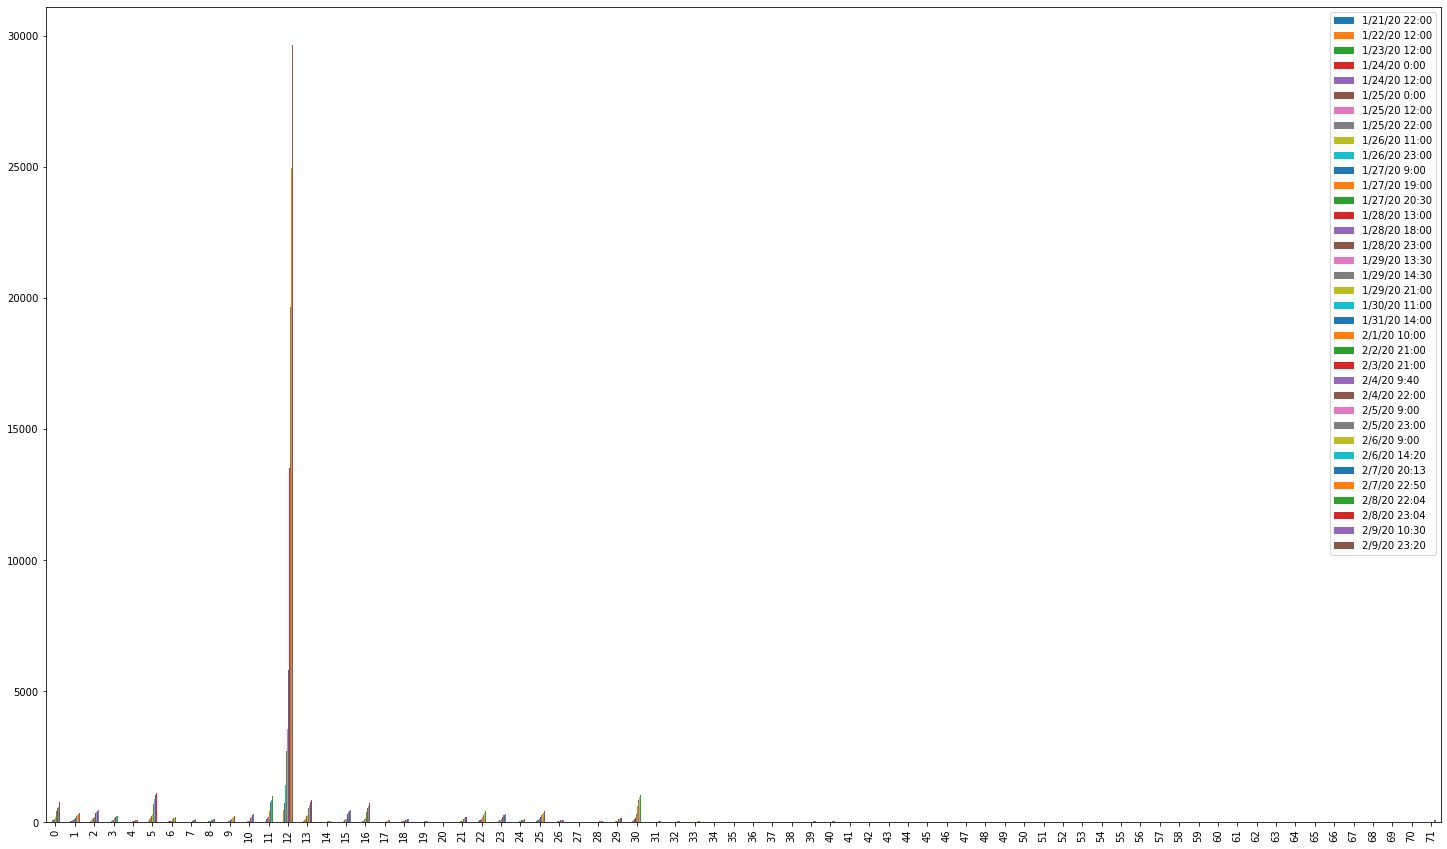

In [0]:
data.plot(figsize=(25,15),kind = 'bar')

In [0]:
len(df[0])

36

In [0]:
# taking the first province as a subject

df_test = df[0]


In [0]:
df_test.shape

(38,)

In [0]:
!  pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [0]:
df_test

Province/State             Anhui
Country/Region    Mainland China
1/21/20 22:00                  0
1/22/20 12:00                  1
1/23/20 12:00                  9
1/24/20 0:00                  15
1/24/20 12:00                 15
1/25/20 0:00                  39
1/25/20 12:00                 39
1/25/20 22:00                 60
1/26/20 11:00                 60
1/26/20 23:00                 70
1/27/20 9:00                  70
1/27/20 19:00                 70
1/27/20 20:30                106
1/28/20 13:00                106
1/28/20 18:00                106
1/28/20 23:00                152
1/29/20 13:30                152
1/29/20 14:30                152
1/29/20 21:00                200
1/30/20 11:00                200
1/31/20 14:00                237
2/1/20 10:00                 297
2/2/20 21:00                 408
2/3/20 21:00                 480
2/4/20 9:40                  480
2/4/20 22:00                 530
2/5/20 9:00                  530
2/5/20 23:00                 591
2/6/20 9:0

Anhui Mainland China


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to co

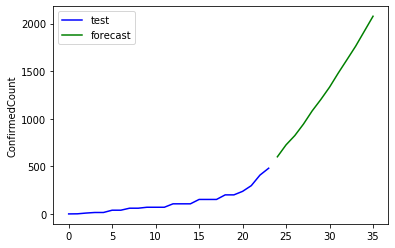

In [0]:
country = df_test[0]
state = df_test[1]
print(country, state)
y = df_test.drop(['Province/State', 'Country/Region'], axis = 0)

import pmdarima as pm
from pmdarima.model_selection import train_test_split

train, test = train_test_split(y, train_size=24)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=1)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:24], train, c='blue')
plt.plot(x[24:], forecasts, c='green')
plt.ylabel('ConfirmedCount')
plt.legend(labels = ('test','forecast'))
plt.show()

<Figure size 720x360 with 0 Axes>

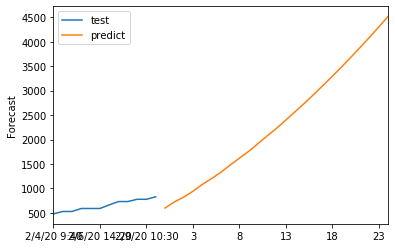

In [0]:
 # forecast next 25 days

future_forecast = model.predict(n_periods= 25)
# create a new dataframe for predicted numbers
future_forecast = pd.DataFrame(future_forecast,columns=['Prediction'])
# join the test and predicted model data into a single dataframe
newdata = pd.concat([test,future_forecast])
plt.figure(figsize=(10,5))
newdata.plot()
plt.ylabel('Forecast')
plt.legend(labels=('test','predict'))
plt.show()

Countrty : Anhui  state : Mainland China


,additional
0,1
1,8
2,6
3,0
4,24
5,0
6,21
7,0
8,10
9,0


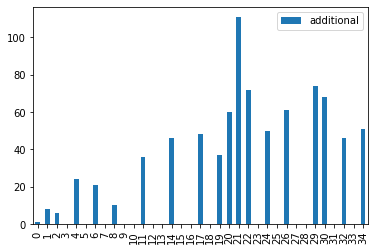

In [0]:
# find the delta in growth

def case_delta(country):
  first = df.iloc[2,country]
  countrytype = df.iloc[0,country]
  state = df.iloc[1,country]
  print('Countrty :' ,countrytype, ' state :' ,state)
  data_growth = []
  for x in df.iloc[3:,country]:
    y = x - first
    data_growth.append(y)
    first = x

  data_growth = pd.DataFrame(data_growth,  columns = ['additional'])
  data_growth.plot(kind='bar')
  return data_growth

countryname = 0 # define the province/state
case_delta(countryname)

In [0]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,Heilongjiang,Henan,Hubei,Hunan,Inner Mongolia,Jiangsu,Jiangxi,Jilin,Liaoning,Ningxia,Qinghai,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang,0,0,0,Taiwan,"Seattle, WA","Chicago, IL","Tempe, AZ",Macau,Hong Kong,0,0,0,0,0,"Toronto, ON",British Columbia,"Orange, CA","Los Angeles, CA",New South Wales,Victoria,Queensland,0,0,0,0,0,0,0,"London, ON",0,0,0,0,"Santa Clara, CA",0,South Australia,"Boston, MA","San Benito, CA",0,"Madison, WI",Diamond Princess cruise ship
Country/Region,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Thailand,Japan,South Korea,Taiwan,US,US,US,Macau,Hong Kong,Singapore,Vietnam,France,Nepal,Malaysia,Canada,Canada,US,US,Australia,Australia,Australia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,Philippines,India,Canada,Italy,UK,Russia,Sweden,US,Spain,Australia,US,US,Belgium,US,Others


Countrty : 0.0  state : Singapore


,additional
0,0
1,1
2,0
3,2
4,0
5,0
6,0
7,1
8,0
9,0


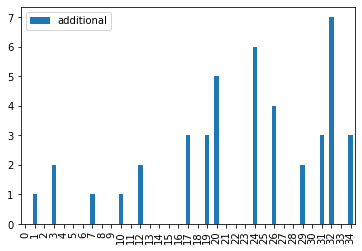

In [0]:
countryname=40
case_delta(countryname)

Countrty : 0.0  state : Singapore


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 8); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 8); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(0, 1, 1, 8); data is likely non-stationary. (if

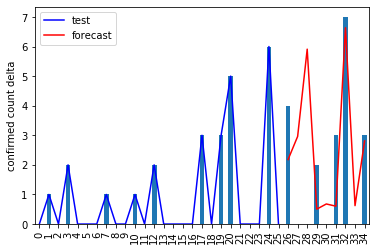

In [0]:
y = case_delta(countryname)
train , test = train_test_split(y,train_size=26)

model = pm.auto_arima(train, seasonal=True, m = 8)
forecasts = model.predict(test.shape[0])
x = np.arange(y.shape[0])
plt.plot(x[:26],train, c='blue')
plt.plot(x[26:], forecasts, c='red')
plt.ylabel('confirmed count delta')
plt.legend(labels = ['test','forecast'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


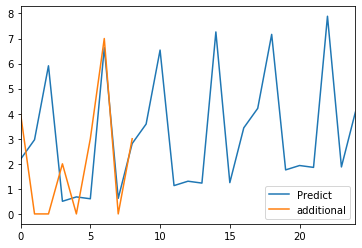

In [0]:
future_forecast = model.predict(n_periods=25)
future_forecast = pd.DataFrame(future_forecast, columns=['Predict'])
test = test.reset_index(drop=True)
new_data = pd.concat([ test,future_forecast])
new_data.plot.line()

In [37]:
data.head()

,Province/State,Country/Region,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30
0,Anhui,Mainland China,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779,830,830,830
1,Beijing,Mainland China,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326,337,337,337
2,Chongqing,Mainland China,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450,468,473,486
3,Fujian,Mainland China,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250,261,261,261
4,Gansu,Mainland China,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79,83,83,86


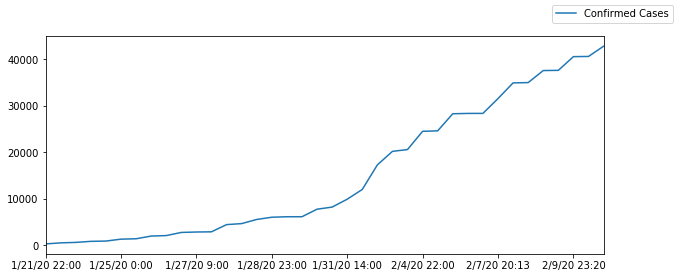

In [40]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots()

data_sum =data.sum()
data_sum.plot(figsize=(10,4))
ax.legend(['Confirmed Cases'])


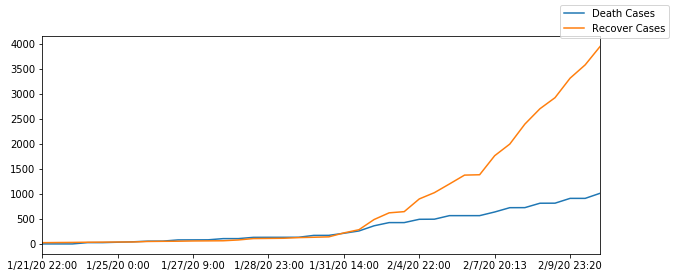

In [91]:
data_death_sum = data_death.sum()
data_recover_sum = data_recover.sum()
ax,fig = plt.subplots()
data_death_sum.plot(figsize=(10,4))
data_recover_sum.plot(figsize=(10,4))
ax.legend(['Death Cases','Recover Cases'])


In [0]:
# convert the string date index to time data format
data_sum.index=pd.to_datetime(data_sum.index)
data_death_sum.index = pd.to_datetime(data_death_sum.index)
data_recover_sum.index = pd.to_datetime(data_recover_sum.index)

In [0]:
# sum the count each day
data_sum.resample('D').sum().inplace=True
data_death_sum.resample('D').sum().inplace = True
data_recover_sum.resample('D').sum().inplace = True



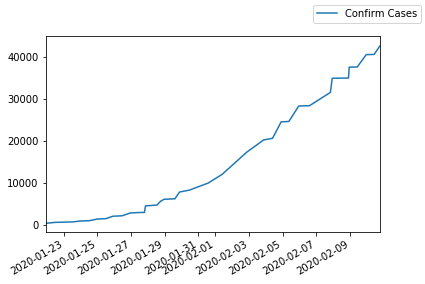

In [95]:
ax, fig = plt.subplots()
data_sum.plot()
ax.legend(['Confirm Cases'])

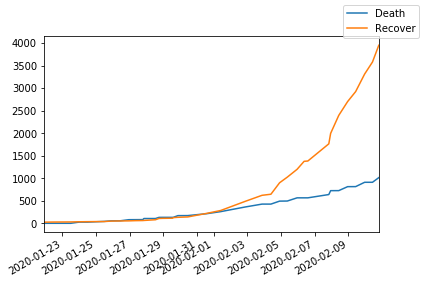

In [97]:
ax,fig = plt.subplots()
data_death_sum.plot()
data_recover_sum.plot()
ax.legend(['Death', 'Recover'])

In [0]:
def rate_of_growth(table):
  tmp = 0
  y = []
  for x in table:
    z = x - tmp
    y.append(z)
    tmp = x
  return y

data_sum_grow = rate_of_growth(data_sum)
data_recover_sum_grow = rate_of_growth(data_recover_sum)
data_death_sum_grow = rate_of_growth(data_death_sum)

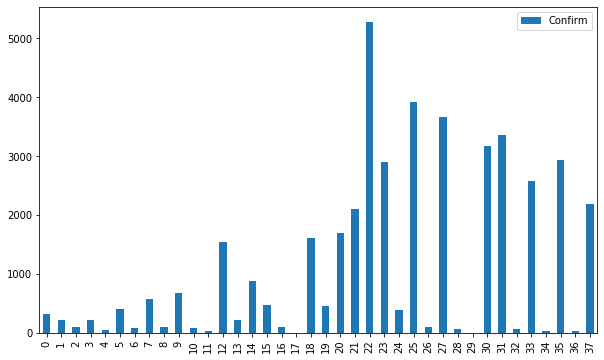

In [134]:
# rate of growth
pd.DataFrame(data_sum_grow).plot(kind= 'bar', figsize = (10,6))
plt.legend(['Confirm'])

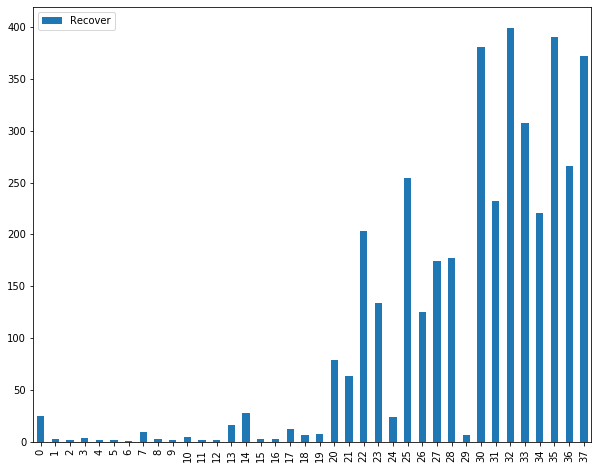

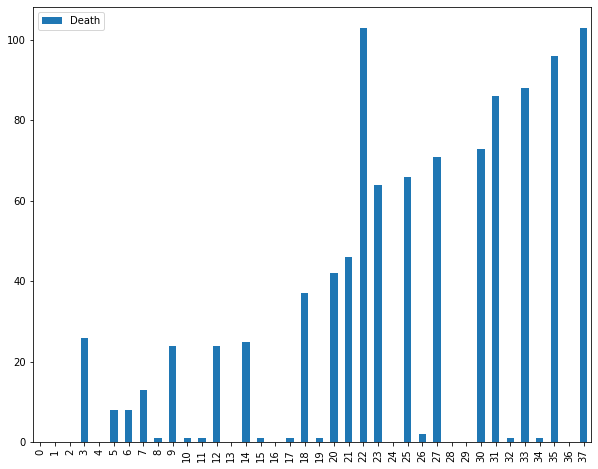

In [135]:

pd.DataFrame(data_recover_sum_grow).plot(kind='bar', figsize = (10,8))
plt.legend(['Recover'])
pd.DataFrame(data_death_sum_grow).plot(kind = 'bar',figsize = (10,8))
plt.legend(['Death'])

